In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
import zipfile
import os, re

In [153]:
path = r'C:\Users\Jchukwuedozi\Documents\data science\datasets\deep learning'

In [154]:
with zipfile.ZipFile(os.path.join(path, 'Twitter sentiment (NLP).zip')) as zip_file:
    with zip_file.open('dataset.csv') as csv_file:
        tweets = pd.read_csv(csv_file)

### Data Inspection

In [155]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937854 entries, 0 to 937853
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      937854 non-null  object
 1   Language  937831 non-null  object
 2   Label     937854 non-null  object
dtypes: object(3)
memory usage: 21.5+ MB


In [156]:
tweets.head()

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious


In [187]:
english_tweets = tweets[tweets['Language']=='en'].reset_index(drop=True)

### Lowercase all text for so all same words can really be same

In [173]:
def lowercase_text(sentence):
    '''This function lower cases all words in the text document'''
    word_list = [word.lower() for word in sentence.split()]
    return ' '.join(word_list)

In [ ]:
english_tweets.loc[:, 'Text'] = english_tweets.loc[:, 'Text'].apply(lowercase_text)

### Remove Abbreviations

In [158]:
abbreviations = {'dem': 'them', 'dey': 'they', 'd': 'the', 'btw': 'by the way',
'pov': 'point of view', 'nd': 'and', '&amp;': 'and', '&': 'and', 'info': 'information', 
'nyt': 'night', 'lyt': 'light', 'stee': 'still', 'tyt': 'tight', 'dem': 'them', 
'2moro': 'tomorrow','b': 'be', 'myt': 'might', 'pple': 'people', 'gud': 'good', 
'ryt': 'right', 'tym': 'time', 'luk': 'look', 'b4': 'before', 'lyk': 'like'}

In [159]:
def remove_abbreviations(sentence):
    ''' This function removes abbreviations from the text document'''
    new_word = []
    word_list = [word for word in sentence.split()]
    for word in word_list:
        if word in abbreviations.keys():
            new_word.append(abbreviations[word])
        else:
            new_word.append(word)
    return ' '.join(new_word)

In [160]:
english_tweets.loc[:, 'Text'] = english_tweets['Text'].apply(remove_abbreviations)

C:\Users\Jchukwuedozi\AppData\Local\Temp\ipykernel_9368\2600802833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_tweets.loc[:, 'Text'] = english_tweets['Text'].apply(remove_abbreviations)


### Removal of stop words

In [161]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    word_list = [word for word in sentence.split()]
    non_stopwords = [word for word in word_list if word not in stop_words]
    return ' '.join(non_stopwords)

In [162]:
english_tweets.loc[:, 'Text'] = english_tweets['Text'].apply(remove_stopwords)

C:\Users\Jchukwuedozi\AppData\Local\Temp\ipykernel_9368\2615450427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_tweets.loc[:, 'Text'] = english_tweets['Text'].apply(remove_stopwords)


### Removal of url links from text

In [163]:
def drop_urls(sentence):
    pattern = r'https*://\w+\.\w+(\.\w+(/\w+)+|/\w+|\.\w+)'
    word_list = [re.sub(pattern, '', word) for word in sentence.split()]
    joined =  ' '.join(word_list)
    drop_whitespace = [word.strip() for word in joined.split()]
    return ' '.join(drop_whitespace)

In [164]:
english_tweets.loc[:, 'Text'] = english_tweets['Text'].apply(drop_urls)

C:\Users\Jchukwuedozi\AppData\Local\Temp\ipykernel_9368\1728307295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_tweets.loc[:, 'Text'] = english_tweets['Text'].apply(drop_urls)


### Visuals of the various categories of text in the English tweet

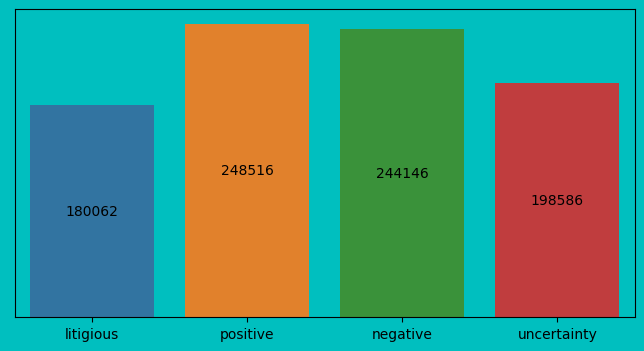

In [165]:
plt.figure(figsize=(8,4), facecolor='c')
chart = sns.countplot(x='Label', data=english_tweets)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks([])
chart.set_facecolor('c')
for container in chart.containers:
    chart.bar_label(container, label_type='center')

### Creating dataframes for the various categories

In [166]:
litigious = english_tweets[english_tweets['Label'] == 'litigious']
positive = english_tweets[english_tweets['Label'] == 'positive']
negative = english_tweets[english_tweets['Label'] == 'negative']
uncertainty = english_tweets[english_tweets['Label'] == 'uncertainty']

### Creating word cloud for all categories

#### Litigious category word cloud

(-0.5, 399.5, 199.5, -0.5)

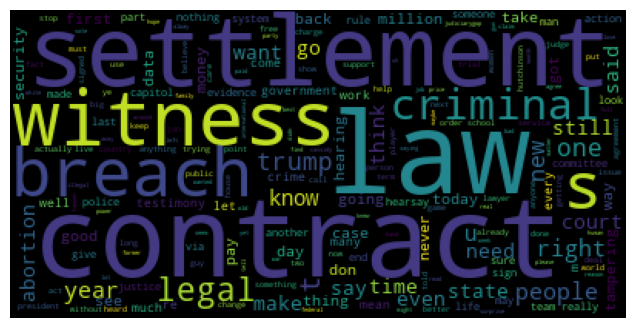

In [167]:
sentence = ''
for word in litigious['Text']:
    sentence += ' '.join(word.split())
Word_cloud = WordCloud(collocations=False).generate(sentence)
fig, ax = plt.subplots(figsize=(8,4))
plt.imshow(Word_cloud);
plt.axis(False)

(-0.5, 399.5, 199.5, -0.5)

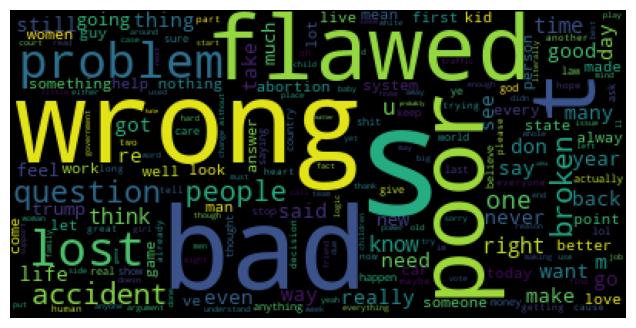

In [168]:
sentence = ''
for word in negative['Text']:
    sentence += ' '.join(word.split())
negword_cloud = WordCloud(collocations=False).generate(sentence)
fig, ax = plt.subplots(figsize=(8,4))
plt.imshow(negword_cloud);
plt.axis(False) 

(-0.5, 399.5, 199.5, -0.5)

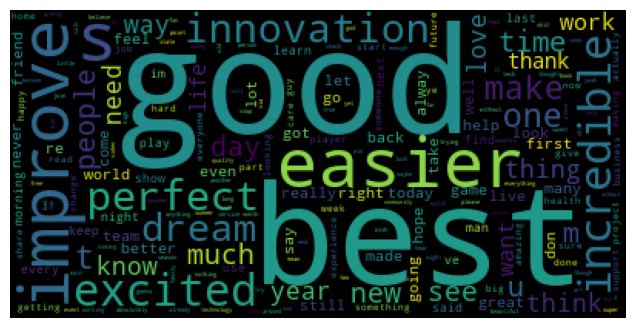

In [171]:
sentence = ''
for word in positive['Text']:
    sentence += ' '.join(word.split())
posword_cloud = WordCloud(collocations=False).generate(sentence)
fig, ax = plt.subplots(figsize=(8,4))
plt.imshow(posword_cloud);
plt.axis(False)

(-0.5, 399.5, 199.5, -0.5)

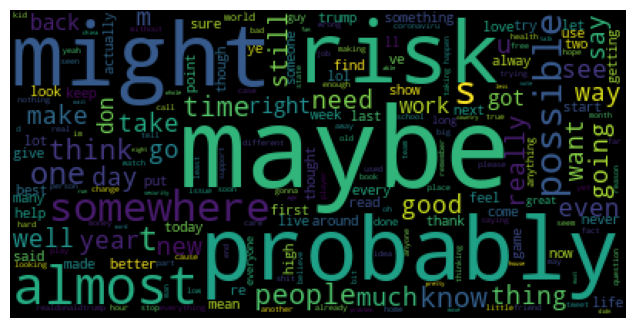

In [172]:
sentence = ''
for word in uncertainty['Text']:
    sentence += ' '.join(word.split())
uncertainty_word_cloud = WordCloud(collocations=False).generate(sentence)
fig, ax = plt.subplots(figsize=(8,4))
plt.imshow(uncertainty_word_cloud);
plt.axis(False)

### Correcting spelling of words in text

In [193]:
def correct_spelling(sentence):
    '''This function corrects missplelled words in the text document'''
    word_list = [str(TextBlob(word).correct()) for word in sentence.split()]
    return ' '.join(word_list)
    

In [ ]:
english_tweets.loc[:, 'Text'] = english_tweets['Text'].apply(correct_spelling)